In [ ]:
# ISC4221 - Homework 2
# by: Andres Candido
# Part 1.4:

import numpy as np

np.random.seed(56789)    # set random number generator seed (turn it into comment if not needed)

print('Enter the number of rolls N: (100, 500, or 1000)') # we assume the input is in the correct data type (only integers)
n = input()
n = int(n)              # input() returns a str, we convert it to an int

Total_2s = 0            # initialize counters for possible rolls
Total_3s = 0
Total_4s = 0
Total_5s = 0
Total_6s = 0
Total_7s = 0
Total_8s = 0
Total_9s = 0
Total_10s = 0
Total_11s = 0
Total_12s = 0

for i in range(n):
    rolled = 0

    for j in range(2):                     # loop twice since have 2 dice
      num = np.random.randint(1,7)        # generate random numbers from 1 to 6 (7 is excluded)

      if num == 1:
        face = 1
      elif num == 2:
        face = 3
      elif num == 3 or num == 4:
        face = 4
      elif num == 5 or num == 6 or num == 7 or num == 8:
        face = 5
      else:
        face = 6

      rolled += face                      # add the numbers from the 2 dice , exit j for loop

    if rolled == 2:                       # increase rolled number counter by 1
      Total_2s += 1
    elif rolled == 3:
      Total_3s += 1
    elif rolled == 4:
      Total_4s += 1
    elif rolled == 5:
      Total_5s += 1
    elif rolled == 6:
      Total_6s += 1
    elif rolled == 7:
      Total_7s += 1
    elif rolled == 8:
      Total_8s += 1
    elif rolled == 9:
      Total_9s += 1
    elif rolled == 10:
      Total_10s += 1
    elif rolled == 11:
      Total_11s += 1
    elif rolled == 12:
      Total_12s += 1


print('Probability that a number occured (2-12):', Total_2s/n, Total_3s/n, Total_4s/n, Total_5s/n, Total_6s/n, Total_7s/n, Total_8s/n, Total_9s/n, Total_10s/n, Total_11s/n, Total_12s/n, )
  


Enter the number of rolls N: (100, 500, or 1000)
1000
Probability that a number occured (2-12): 0.007 0.0 0.023 0.042 0.09 0.078 0.119 0.204 0.242 0.166 0.029


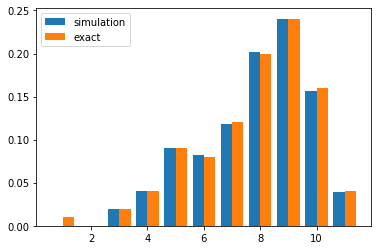

In [ ]:
# Part 1.6:

import numpy as np
import matplotlib.pyplot as plt

np.random.seed(56789)  # set seed to 56789
nsample = 10000


# cumulative density function 
cdf = np.array([0.01, 0.01, 0.03, 0.07, 0.16, 0.24, 0.36, 0.56, 0.8, 0.96, 1.00])
                 
Expected_pdf = np.array([0.01, 0, 0.02, 0.04, 0.09, 0.08, 0.12, 0.2, 0.24, 0.16, 0.04])

# initialize counters for each outcome 
count = np.zeros(11, dtype=np.uint32)

# simulate rolling two dice 
for k in range(nsample):
    r = np.random.random()
    for i in range(2,12):  # possible outcomes 2...12
        if cdf[i-2] < r and r <= cdf[i-1]: 
            count[i-1] = count[i-1] + 1
            
            
freq = count/nsample  # convert to probability 
x = np.arange(1,12)   # possible outcomes [1,2,3,...,12]


plt.bar(x-0.2,freq,width=0.4,label='simulation')
plt.bar(x+0.2,Expected_pdf,width=0.4,label='exact')
plt.legend()  # add legend
plt.show()

In [ ]:
# Part 2.1:

from scipy import integrate

e=2.71828182

func = lambda x: x*( e**( (x**2)/10 ) )

prob = integrate.quad(func, 0.5, 0.6)

print(prob)

(0.05670362982709074, 6.295367541385792e-16)


In [ ]:
# Part 2.2:

import numpy as np
import random
from scipy import integrate

e=2.71828182
func = lambda x: x*( e**( (x**2)/10 ) )

CDF1 = integrate.quad(func, 0, 0.5)
CDF2 = integrate.quad(func, 0, 0.6)

count = 0
N_sample = 10000

for i in range(N_sample):
    x = np.random.uniform(0,1)
    if x>CDF1[0] and x<CDF2[0]:
        count = count + 1

Expected = 0.05670362982709074
Estimated = count/N_sample
error = abs( (Estimated - Expected)/Expected )

print('# of points in range: ',count)
print('total points: ',N_sample)
print('Estimated value:', Estimated)
print('Error:', error)

# of points in range:  536
total points:  10000
Estimated value: 0.0536
Error: 0.05473423547231096
